In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NLP imports
import unidecode 
import nltk
from nltk.corpus import framenet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import re


#Classification imports
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier,LogisticRegression
 

In [41]:
#nltk.download()

In [42]:
# Load Data
df= pd.read_csv("Job titles and industries.csv")
df.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [44]:
# Calculate the duplicats
#show 4618 Dublicated row  
# then we got (8586 - 4618) 
Duplicated=len(df)-len(df.drop_duplicates())
print("num of duplicated Rows : " , Duplicated)
print("num of not duplicated Rows : " , (len(df)- Duplicated))



num of duplicated Rows :  4618
num of not duplicated Rows :  3968


There are 4618 duplicated rows in the dataset and 3968 not duplicated

In [45]:
print(np.array(df['job title'].unique()))
print("##################################")
print("Lenght of unique entries in jop title column : ",len(df['job title'].unique()))


['technical support and helpdesk supervisor - county buildings, ayr soa04086'
 'senior technical support engineer' 'head of it services' ...
 'sales & marketing manager' 'marketing & digital marketing consultant'
 'creative copywriter (arabic/english)']
##################################
Lenght of unique entries in jop title column :  3890


There are only  3890 unique entries in job titles
There are only  4 unique entries in industry

In [46]:
print(np.array(df['industry'].unique()))
print("##################################")
print("Lenght of unique entries in industry column : ",len(df['industry'].unique()))



['IT' 'Marketing' 'Education' 'Accountancy']
##################################
Lenght of unique entries in industry column :  4


In [47]:
df["industry"].value_counts()

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

In [48]:
df["job title"].value_counts()

marketing executive                                           91
php developer                                                 54
trainee network technician                                    53
software developer                                            53
marketing manager                                             49
                                                              ..
assistant marketing manager                                    1
primary and secondary teacher                                  1
senior pmo analyst - brighton                                  1
kindergarten class teacher                                     1
accountancy software trainer - manchester - remote working     1
Name: job title, Length: 3890, dtype: int64

<Figure size 1440x1440 with 0 Axes>

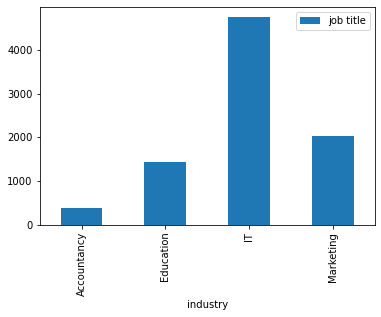

In [49]:
plt.figure(figsize=(20,20));
df.groupby('industry').count().plot.bar(ylim=0);
plt.show();

### Which techniques you have used while cleaning the data if you have cleaned it?

### 1) Cleaning dataset using Remove Outliers

In [50]:
# Solution
df_Cleaned = df.drop_duplicates(subset="job title")
#test
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  3890 non-null   object
 1   industry   3890 non-null   object
dtypes: object(2)
memory usage: 91.2+ KB


### 2) Cleaning dataset using Text Pre-processing 

#### Step-1: Remove Accented Characters

In [51]:
# Code for accented characters removal
def accented_characters_removal(text):
    # this is a docstring
    """
    The function will remove accented characters from the 
    text contained within the Dataset.
       
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" with removed accented characters.
        
    Example:
    Input : Málaga, àéêöhello
    Output : Malaga, aeeohello    
        
    """
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)
    return text

df_Cleaned['job title'] = df_Cleaned['job title'].map(accented_characters_removal)
df_Cleaned.head()


<ipython-input-51-40cf6a8b73a2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['job title'] = df_Cleaned['job title'].map(accented_characters_removal)


,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


### Step-2: Case Conversion

In [52]:
# Code for text lowercasing
def lower_casing_text(text):
    
    """ 
    Example:
    Input : The World is Full of Surprises!
    Output : the world is full of surprises!
    
    """
    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    return text
df_Cleaned['job title'] = df_Cleaned['job title'].map(lower_casing_text)
df_Cleaned.head()

<ipython-input-52-abfa1a316234>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['job title'] = df_Cleaned['job title'].map(lower_casing_text)


,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


### Step-3: Remove Special Characters

In [53]:
# The code for removing special characters
def removing_special_characters(text):
    """    
    Example: 
    Input : Hello, K-a-j-a-l. Thi*s is $100.05 : the payment that you will recieve! (Is this okay?) 
    Output :  Hello, Kajal. This is $100.05 : the payment that you will recieve! Is this okay?
   """
    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text) 
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    return Formatted_Text
#test
df_Cleaned['job title'] = df_Cleaned['job title'].map(removing_special_characters)
df_Cleaned.head()

<ipython-input-53-6225315f878f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['job title'] = df_Cleaned['job title'].map(removing_special_characters)


,job title,industry
0,technical support and helpdesk supervisor coun...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


### Step-4 : Remove Stopwords and Replace symbols by space

In [54]:
## Remove Stopwords and Replace symbols by space

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
df_Cleaned['job title'] = df_Cleaned['job title'].map(clean_text)
df_Cleaned.head()

<ipython-input-54-b42e8a7f29ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['job title'] = df_Cleaned['job title'].map(clean_text)


,job title,industry
0,technical support helpdesk supervisor county b...,IT
1,senior technical support engineer,IT
2,head services,IT
3,js front end engineer,IT
4,network telephony controller,IT


#### Spllitting Data

In [55]:

X = df_Cleaned['job title']
y = df_Cleaned['industry']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
weights = compute_sample_weight("balanced",y_train)

## Apply Model
#### 1) Naive Bayes classifier for multinomial models

In [56]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),])

nb.fit(X_train, y_train, **{'clf__sample_weight': weights})

y_pred = nb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8735868448098664


In [57]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=np.array(df['industry'].unique())))

              precision    recall  f1-score   support

          IT       0.59      0.84      0.70        64
   Marketing       0.97      0.84      0.90       231
   Education       0.95      0.86      0.90       404
 Accountancy       0.81      0.93      0.86       274

    accuracy                           0.87       973
   macro avg       0.83      0.87      0.84       973
weighted avg       0.89      0.87      0.88       973



### LogisticRegression 

In [58]:

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train, **{'clf__sample_weight': weights})

y_pred = logreg.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8591983556012333


C:\Users\FreeComp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=np.array(df['industry'].unique())))

              precision    recall  f1-score   support

          IT       0.84      0.67      0.75        64
   Marketing       0.88      0.86      0.87       231
   Education       0.87      0.88      0.88       404
 Accountancy       0.83      0.86      0.84       274

    accuracy                           0.86       973
   macro avg       0.86      0.82      0.84       973
weighted avg       0.86      0.86      0.86       973



### DecisionTreeClassifier

In [60]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier()),
               ])
dt.fit(X_train, y_train,**{'clf__sample_weight': weights})
y_pred = dt.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8406988694758479


In [61]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=np.array(df['industry'].unique())))

              precision    recall  f1-score   support

          IT       0.72      0.67      0.69        64
   Marketing       0.82      0.92      0.86       231
   Education       0.89      0.83      0.86       404
 Accountancy       0.83      0.83      0.83       274

    accuracy                           0.84       973
   macro avg       0.81      0.81      0.81       973
weighted avg       0.84      0.84      0.84       973



### RandomForestClassifier 

In [62]:


from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators = 400, criterion = 'entropy')),
               ])
rf.fit(X_train, y_train,**{'clf__sample_weight': weights})
y_pred = rf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.869475847893114


In [63]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=np.array(df['industry'].unique())))

              precision    recall  f1-score   support

          IT       0.89      0.73      0.80        64
   Marketing       0.86      0.90      0.88       231
   Education       0.90      0.88      0.89       404
 Accountancy       0.84      0.86      0.85       274

    accuracy                           0.87       973
   macro avg       0.87      0.84      0.85       973
weighted avg       0.87      0.87      0.87       973



### SVC as kernal "rbf"

In [64]:
from sklearn.svm import SVC
svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(kernel='rbf', gamma=0.7, C=1.0)),
               ])
svm.fit(X_train, y_train,**{'clf__sample_weight': weights})
y_pred = svm.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9033915724563206


## evaluate your model(i.e. accuracy, F1 score, Recall)

In [65]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=np.array(df['industry'].unique())))

              precision    recall  f1-score   support

          IT       0.89      0.78      0.83        64
   Marketing       0.94      0.92      0.93       231
   Education       0.94      0.89      0.91       404
 Accountancy       0.83      0.94      0.88       274

    accuracy                           0.90       973
   macro avg       0.90      0.88      0.89       973
weighted avg       0.91      0.90      0.90       973



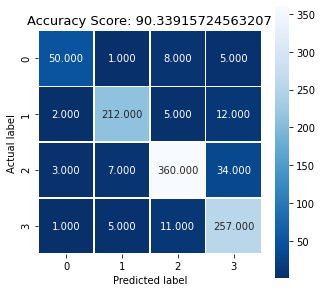

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

## I used the SVM(RBF Kernel) as a final model Because it overcomes the space complexity problem where RBF Kernel Support Vector Machines only need to store support vectors during training and not the entire data set . And in this problem it got higher accuracy . 

## Deploy the RESTful API service Using Flask API

In [86]:
from joblib import dump, load
dump(svm, 'text_classification.joblib')

['text_classification.joblib']

In [85]:
from flask import Flask,render_template
from flask_restful import Api, Resource, reqparse
import requests
from joblib import dump, load
#Defining App !
app = Flask(__name__)
api = Api(app)

# Only one Endpoint to API supported: {GET}
class Model(Resource):
    # Endpoint to Get a Campaign already created in my datastore.
    def get(self, job_title):
        model = load('text_classification.joblib')
        pred_industry = model.predict([job_title])
        return pred_industry[0], 200

# Adding routes to the Application and Endpoints to App.
api.add_resource(Model, "/predict/api/<string:job_title>")
# Run this baby server !
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Sep/2021 12:25:59] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Sep/2021 12:26:17] "GET /predict/api/%3Cstring:js%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:28:01] "GET /predict/api/%3Cstring:php%20web%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:28:22] "GET /predict/api/%3Cstring:data%20scientist%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:28:24] "GET /predict/api/%3Cstring:data%20scientist%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:28:58] "GET /predict/api/%3Cstring:treasury%20analyst%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:29:27] "GET /predict/api/%3Cstring:marketing%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:30:48] "GET /predict/api/%3Cstring:data%20entry%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:31:01] "GET /predict/api/%3Cstring:sales%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2021 12:31:04] "GET /predict/api/%3Cstring:sales%3E HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2